# Imports <a class="anchor"><a id='Imports'></a></b><br>

In [ ]:
#Imports of Libaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import sqlite3
import os
from math import ceil
from datetime import datetime
from itertools import product
import warnings
import missingno as mno
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from pickle import dump
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from yellowbrick.cluster import KElbowVisualizer
from matplotlib import ticker
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import InterclusterDistance



%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.decomposition import PCA


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Importation and Regulaization <a class="anchor"><a id='Imp'></a></b><br>

In [ ]:
#Importing data from CSV

#df = pd.read_csv('/content/drive/MyDrive/all tutorials/Case1_HotelCustomerSegmentation.csv')
df = pd.read_csv('/content/Case1_HotelCustomerSegmentation.csv')
# Load data
#df = pd.read_csv('/kaggle/input/wali-3/Case1_HotelCustomerSegmentation.csv', sep=";")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111733 entries, 0 to 111732
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                         Non-Null Count   Dtype 
---  ------                                                                                                                                                                                                                                                                                                                                                                                         --------------   ----- 
 0   ID;Nationality;Age;DaysSinceCreation;NameHash;DocIDHash;Avera

In [ ]:
#Visualisation of the Inital data shape

df.shape

(111733, 1)

In [ ]:
#Visualiasation of the first 5 rows, in order to get a sense of the whats up with the data

df.head()

,ID;Nationality;Age;DaysSinceCreation;NameHash;DocIDHash;AverageLeadTime;LodgingRevenue;OtherRevenue;BookingsCanceled;BookingsNoShowed;BookingsCheckedIn;PersonsNights;RoomNights;DistributionChannel;MarketSegment;SRHighFloor;SRLowFloor;SRAccessibleRoom;SRMediumFloor;SRBathtub;SRShower;SRCrib;SRKingSizeBed;SRTwinBed;SRNearElevator;SRAwayFromElevator;SRNoAlcoholInMiniBar;SRQuietRoom
0,1;PRT;52;440;0x2C371FD6CE12936774A139FD7430C62...
1,2;PRT;NULL;1385;0x198CDB98BF37B6E23F9548C56A88...
2,3;DEU;32;1385;0xDA46E62F66936284DF2844EC4FC542...
3,4;FRA;61;1385;0xC45D4CD22C58FDC5FD0F95315F6EFA...
4,5;FRA;52;1385;0xD2E3D5BFCA141865669F98D64CDA85...


In [ ]:
#Fixing columns problem (iregularites using the ";" as a delimiter to separate data into the intended columns)

#file_path = '/content/drive/MyDrive/all tutorials/Case1_HotelCustomerSegmentation.csv' <--- I made this so yoou dont have to constantly change it Mohammad
file_path = '/content/Case1_HotelCustomerSegmentation.csv'  # Replace with your actual file path
try:
    df = pd.read_csv(file_path, sep=";", engine='python', error_bad_lines=False)
    print(df.head())
except pd.errors.ParserError as e:
    print(f"Error parsing file: {e}")

<ipython-input-88-5b66c1bc5ff0>:6: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.





   ID Nationality   Age  DaysSinceCreation  \
0   1         PRT  52.0                440   
1   2         PRT   NaN               1385   
2   3         DEU  32.0               1385   
3   4         FRA  61.0               1385   
4   5         FRA  52.0               1385   

                                            NameHash  \
0  0x2C371FD6CE12936774A139FD7430C624F1C4D5109CE6...   
1  0x198CDB98BF37B6E23F9548C56A88B00912D65A9AA0D6...   
2  0xDA46E62F66936284DF2844EC4FC542D0DAD780C0EE0C...   
3  0xC45D4CD22C58FDC5FD0F95315F6EFA5A6E7149187D49...   
4  0xD2E3D5BFCA141865669F98D64CDA85AD04DEFF47F8A0...   

                                           DocIDHash  AverageLeadTime  \
0  0x434FD3D59469C73AFEA087017FAF8CA2296493AEABDE...               59   
1  0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...               61   
2  0x27F5DF762CCDA622C752CCDA45794923BED9F1B66300...                0   
3  0x8E59572913BB9B1E6CAA12FA2C8B7BF387B1D1F3432E...               93   
4  0x42BDEE0E05A9441C

In [ ]:
#reassign the column names

column_names = [
    "ID", "Nationality", "Age", "DaysSinceCreation", "NameHash", "DocIDHash",
    "AverageLeadTime", "LodgingRevenue", "OtherRevenue", "BookingsCanceled",
    "BookingsNoShowed", "BookingsCheckedIn", "PersonsNights", "RoomNights",
    "DistributionChannel", "MarketSegment", "SRHighFloor", "SRLowFloor",
    "SRAccessibleRoom", "SRMediumFloor", "SRBathtub", "SRShower", "SRCrib",
    "SRKingSizeBed", "SRTwinBed", "SRNearElevator", "SRAwayFromElevator",
    "SRNoAlcoholInMiniBar", "SRQuietRoom"
]
df.columns = column_names

In [ ]:
#checking the data again to see it has been fixed

df.head()

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,52.0,440,0x2C371FD6CE12936774A139FD7430C624F1C4D5109CE6...,0x434FD3D59469C73AFEA087017FAF8CA2296493AEABDE...,59,292.0,82.3,1,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,NaN,1385,0x198CDB98BF37B6E23F9548C56A88B00912D65A9AA0D6...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,61,280.0,53.0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,DEU,32.0,1385,0xDA46E62F66936284DF2844EC4FC542D0DAD780C0EE0C...,0x27F5DF762CCDA622C752CCDA45794923BED9F1B66300...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,FRA,61.0,1385,0xC45D4CD22C58FDC5FD0F95315F6EFA5A6E7149187D49...,0x8E59572913BB9B1E6CAA12FA2C8B7BF387B1D1F3432E...,93,240.0,60.0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,52.0,1385,0xD2E3D5BFCA141865669F98D64CDA85AD04DEFF47F8A0...,0x42BDEE0E05A9441C94147076EDDCC47E604DA5447DD4...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


# Data Preprocessing <a class="anchor"><a id='Pre'></a></b><br>

## Exploration <a class="anchor"><a id='Exploration'></a></b><br>

In [ ]:
df.describe

<bound method NDFrame.describe of             ID Nationality   Age  DaysSinceCreation  \
0            1         PRT  52.0                440   
1            2         PRT   NaN               1385   
2            3         DEU  32.0               1385   
3            4         FRA  61.0               1385   
4            5         FRA  52.0               1385   
...        ...         ...   ...                ...   
111728  111729         DEU  31.0                 36   
111729  111730         BRA  43.0                 36   
111730  111731         BRA  37.0                 36   
111731  111732         DEU  48.0                 36   
111732  111733         DEU  48.0                 36   

                                                 NameHash  \
0       0x2C371FD6CE12936774A139FD7430C624F1C4D5109CE6...   
1       0x198CDB98BF37B6E23F9548C56A88B00912D65A9AA0D6...   
2       0xDA46E62F66936284DF2844EC4FC542D0DAD780C0EE0C...   
3       0xC45D4CD22C58FDC5FD0F95315F6EFA5A6E7149187D49...   
4       0xD2E3D5BFCA141865669F98D64CDA85AD04DEFF47F8A0...   
...                                                   ...   
111728  0x2F59F0E86596B861C3303585FDB7F090B1B2D70442C5...   
111729  0x2708B9F11C95F384129152CDF0830B566F02D42B87AC...   
111730  0xEF5F6AAA6120F2AC49179E16FD12477C243A8F4FC504...   
111731  0xC70AE03F615CB96B0C84CF29419C2DDFE8EC64B77104...   
111732  0xE52EE501843E3108F20BB8F2EC180D8654DF1424EFA2...   

                                                DocIDHash  AverageLeadTime  \
0       0x434FD3D59469C73AFEA087017FAF8CA2296493AEABDE...               59   
1       0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...               61   
2       0x27F5DF762CCDA622C752CCDA45794923BED9F1B66300...                0   
3       0x8E59572913BB9B1E6CAA12FA2C8B7BF387B1D1F3432E...               93   
4       0x42BDEE0E05A9441C94147076EDDCC47E604DA5447DD4...                0   
...                                                   ...              ...   
111728  0x86AC02B9393E7F58354BA4193D792C07DB91D4BE27C7...                0   
111729  0xE87DEB08B0D7D0BDC590949FF04AAA893018BD8EB714...              170   
111730  0x74B9B5A554F5F660371E56D4CE4C1D4C3DC80AE71D68...                0   
111731  0xF589C016E6988AECD3E3BE793E7D606BBDB6B6D4795C...               66   
111732  0xD539E89183AB389864B7A24B3C1FBC1FE20A40ED02E7...                0   

        LodgingRevenue  OtherRevenue  BookingsCanceled  ...  SRMediumFloor  \
0               292.00          82.3                 1  ...              0   
1               280.00          53.0                 0  ...              0   
2                 0.00           0.0                 0  ...              0   
3               240.00          60.0                 0  ...              0   
4                 0.00           0.0                 0  ...              0   
...                ...           ...               ...  ...            ...   
111728            0.00           0.0                 0  ...              0   
111729          755.25          20.0                 0  ...              0   
111730            0.00           0.0                 0  ...              0   
111731          708.00         185.0                 0  ...              0   
111732            0.00           0.0                 0  ...              0   

        SRBathtub  SRShower  SRCrib SRKingSizeBed SRTwinBed  SRNearElevator  \
0               0         0       0             0         0               0   
1               0         0       0             0         0               0   
2               0         0       0             0         0               0   
3               0         0       0             0         0               0   
4               0         0       0             0         0               0   
...           ...       ...     ...           ...       ...             ...   
111728          0         0       0             1         0               0   
111729          0         0       0             1         0       

## Metric and Non-Metric Features <a class="anchor"><a id='Me_Non-Me'></a></b><br>

In [ ]:
df.dtypes

ID                        int64
Nationality              object
Age                     float64
DaysSinceCreation         int64
NameHash                 object
DocIDHash                object
AverageLeadTime           int64
LodgingRevenue          float64
OtherRevenue            float64
BookingsCanceled          int64
BookingsNoShowed          int64
BookingsCheckedIn         int64
PersonsNights             int64
RoomNights                int64
DistributionChannel      object
MarketSegment            object
SRHighFloor               int64
SRLowFloor                int64
SRAccessibleRoom          int64
SRMediumFloor             int64
SRBathtub                 int64
SRShower                  int64
SRCrib                    int64
SRKingSizeBed             int64
SRTwinBed                 int64
SRNearElevator            int64
SRAwayFromElevator        int64
SRNoAlcoholInMiniBar      int64
SRQuietRoom               int64
dtype: object

In [ ]:
#To further explore the data we will divide the data to numeric and non numeric to further explore the data.

#numeric columns
#numeric_df = df.select_dtypes(include=[np.number])

#non-numeric (object in this case) columns
#non_numeric_df = df.select_dtypes(exclude=[np.number])

In [ ]:
# Metric (Numeric) features
metric_features = [
    "Age", "DaysSinceCreation", "AverageLeadTime", "LodgingRevenue",
    "OtherRevenue", "BookingsCanceled", "BookingsNoShowed", "BookingsCheckedIn",
    "PersonsNights", "RoomNights"
]

# Non-metric (Non-numeric) features
non_metric_features = [
    "ID", "Nationality", "NameHash", "DocIDHash", "DistributionChannel",
    "MarketSegment", "SRHighFloor", "SRLowFloor", "SRAccessibleRoom",
    "SRMediumFloor", "SRBathtub", "SRShower", "SRCrib", "SRKingSizeBed",
    "SRTwinBed", "SRNearElevator", "SRAwayFromElevator", "SRNoAlcoholInMiniBar",
    "SRQuietRoom"
]

# Now, you can select these features directly from your DataFrame
numeric_df = df[metric_features]
non_numeric_df = df[non_metric_features]

In [ ]:
numeric_df.head(5)

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights
0,52.0,440,59,292.0,82.3,1,0,2,6,4
1,NaN,1385,61,280.0,53.0,0,0,1,10,5
2,32.0,1385,0,0.0,0.0,0,0,0,0,0
3,61.0,1385,93,240.0,60.0,0,0,1,10,5
4,52.0,1385,0,0.0,0.0,0,0,0,0,0


In [ ]:
non_numeric_df.head(5)

,ID,Nationality,NameHash,DocIDHash,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,0x2C371FD6CE12936774A139FD7430C624F1C4D5109CE6...,0x434FD3D59469C73AFEA087017FAF8CA2296493AEABDE...,Corporate,Corporate,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,PRT,0x198CDB98BF37B6E23F9548C56A88B00912D65A9AA0D6...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,DEU,0xDA46E62F66936284DF2844EC4FC542D0DAD780C0EE0C...,0x27F5DF762CCDA622C752CCDA45794923BED9F1B66300...,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,FRA,0xC45D4CD22C58FDC5FD0F95315F6EFA5A6E7149187D49...,0x8E59572913BB9B1E6CAA12FA2C8B7BF387B1D1F3432E...,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,FRA,0xD2E3D5BFCA141865669F98D64CDA85AD04DEFF47F8A0...,0x42BDEE0E05A9441C94147076EDDCC47E604DA5447DD4...,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0


## Missing Values <a class="anchor"><a id='Missing Values'></a></b><br>

In [ ]:
#Turning "?" into nan which is what python identifies missing values
Oddmissingvalues = ["?","$","%","!","*","+","_","@","€"," ","{"]
df.replace(Oddmissingvalues, np.nan, inplace = True)

In [ ]:
#Here we are specifically looking for all the Missing values in the native for of Nan

pd.set_option('display.max_rows', 300)
df.isna().sum()

ID                         0
Nationality                0
Age                     4172
DaysSinceCreation          0
NameHash                   0
DocIDHash               1001
AverageLeadTime            0
LodgingRevenue             0
OtherRevenue               0
BookingsCanceled           0
BookingsNoShowed           0
BookingsCheckedIn          0
PersonsNights              0
RoomNights                 0
DistributionChannel        0
MarketSegment              0
SRHighFloor                0
SRLowFloor                 0
SRAccessibleRoom           0
SRMediumFloor              0
SRBathtub                  0
SRShower                   0
SRCrib                     0
SRKingSizeBed              0
SRTwinBed                  0
SRNearElevator             0
SRAwayFromElevator         0
SRNoAlcoholInMiniBar       0
SRQuietRoom                0
dtype: int64

In [ ]:
#This is just a percentage of the missing values in Nan for to explore the idea of possible deleting or adding mode and how much of the data it would effect

df.isna().sum()/len(df)*100

ID                      0.000000
Nationality             0.000000
Age                     3.733901
DaysSinceCreation       0.000000
NameHash                0.000000
DocIDHash               0.895886
AverageLeadTime         0.000000
LodgingRevenue          0.000000
OtherRevenue            0.000000
BookingsCanceled        0.000000
BookingsNoShowed        0.000000
BookingsCheckedIn       0.000000
PersonsNights           0.000000
RoomNights              0.000000
DistributionChannel     0.000000
MarketSegment           0.000000
SRHighFloor             0.000000
SRLowFloor              0.000000
SRAccessibleRoom        0.000000
SRMediumFloor           0.000000
SRBathtub               0.000000
SRShower                0.000000
SRCrib                  0.000000
SRKingSizeBed           0.000000
SRTwinBed               0.000000
SRNearElevator          0.000000
SRAwayFromElevator      0.000000
SRNoAlcoholInMiniBar    0.000000
SRQuietRoom             0.000000
dtype: float64

<Axes: >

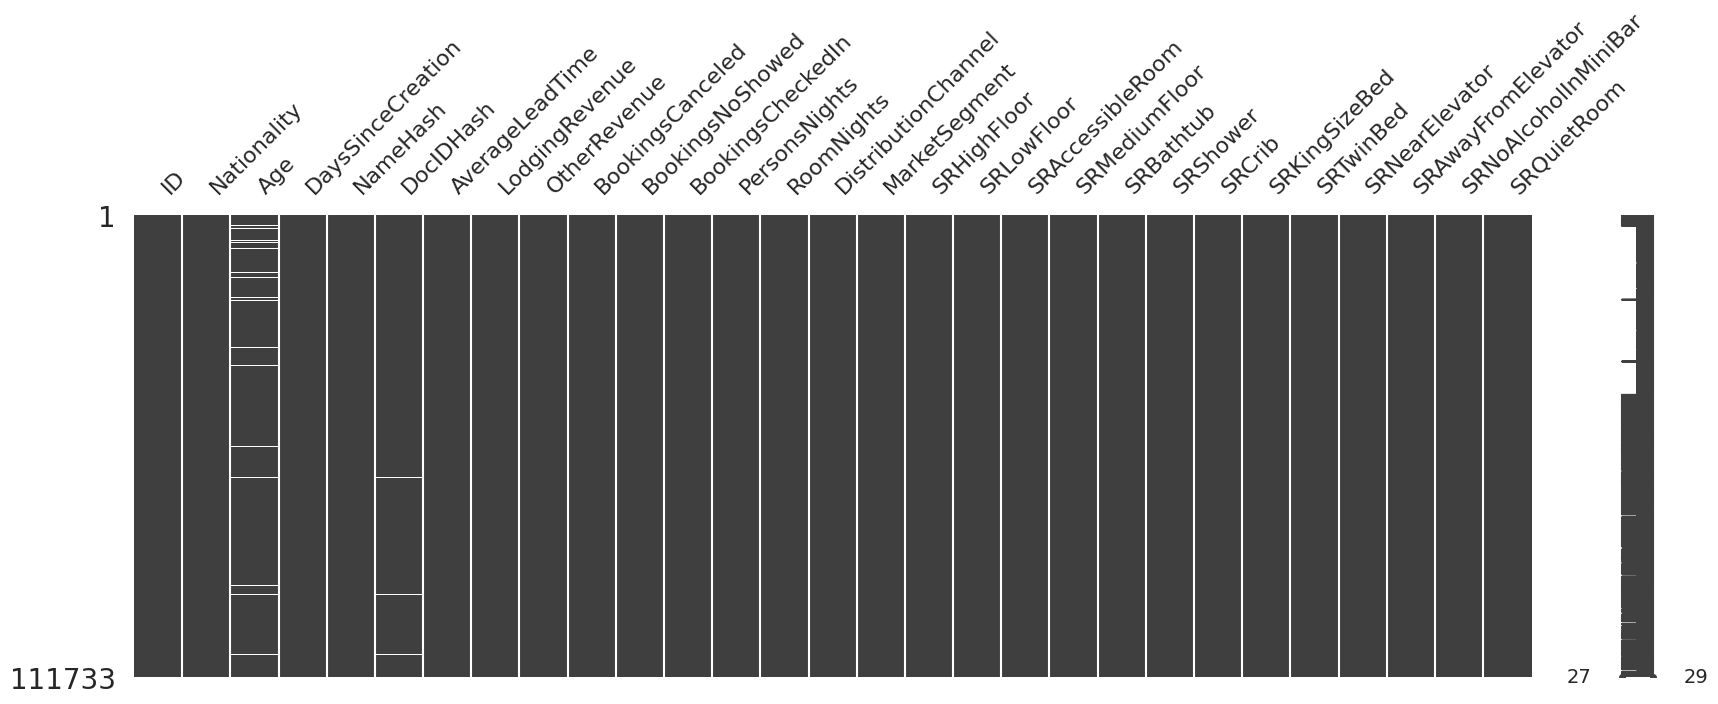

In [ ]:
mno.matrix(df, figsize = (20, 6))

In [ ]:
# To fill in the NAN we will use the KNN Imputer and for that we first need to convert necessary columns to numeric

# Initialize the KNN Imputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')

# Fit the imputer and transform your data (this will return a numpy array)
imputed_data = imputer.fit_transform(df.select_dtypes(include=[np.number]))

# Convert the imputed numpy array back to a DataFrame
imputed_df = pd.DataFrame(imputed_data, columns=df.select_dtypes(include=[np.number]).columns)

# If you want to update your original dataframe with the imputed values for the numeric columns
df.update(imputed_df)

# Display the first few rows of the dataframe to check the imputed values
print(df.head())

In [ ]:
#Here we are specifically looking for all the Missing values in the native for of Nan

pd.set_option('display.max_rows', 300)
df.isna().sum()

In [ ]:
# Find duplicate 'NameHash' values
duplicates = df[df.duplicated('NameHash', keep=False)].sort_values('NameHash')

# Displaying the duplicates
print(duplicates.count())

In [ ]:
#This take the direct (here it doing with age and average lead time) and turns them into numeric so it can be averaged
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['AverageLeadTime'] = pd.to_numeric(df['AverageLeadTime'], errors='coerce')

# Define the aggregation rules for each column, ensuring 'mean' is only used on numeric columns
aggregation_rules = {
    'ID': 'first',
    'Nationality': 'first',
    'Age': 'mean',
    'DaysSinceCreation': 'first',
    'DocIDHash': 'first',
    'AverageLeadTime': 'mean',
    'LodgingRevenue': 'sum',
    'OtherRevenue': 'sum',
    'BookingsCanceled': 'sum',
    'BookingsNoShowed': 'sum',
    'BookingsCheckedIn': 'sum',
    'PersonsNights': 'sum',
    'RoomNights': 'sum',
    'DistributionChannel': 'first',
    'MarketSegment': 'first',
    # Ensure special request fields are handled appropriately (e.g., 'max' for binary indicators)
    'SRHighFloor': 'max',
    'SRLowFloor': 'max',
    'SRAccessibleRoom': 'max',
    'SRMediumFloor': 'max',
    'SRBathtub': 'max',
    'SRShower': 'max',
    'SRCrib': 'max',
    'SRKingSizeBed': 'max',
    'SRTwinBed': 'max',
    'SRNearElevator': 'max',
    'SRAwayFromElevator': 'max',
    'SRNoAlcoholInMiniBar': 'max',
    'SRQuietRoom': 'max'
}

# Group by 'NameHash' and apply the aggregation rules
df = df.groupby('NameHash').agg(aggregation_rules).reset_index()

# Display the first few rows of the processed DataFrame to verify the results
print(df.head())

In [ ]:
#Checking missing values again
pd.set_option('display.max_rows', 300)
df.isna().sum()

In [ ]:
# To fill in the NAN we will use the KNN Imputer and for that we first need to convert necessary columns to numeric

# Initialize the KNN Imputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')

# Fit the imputer and transform your data (this will return a numpy array)
imputed_data = imputer.fit_transform(df.select_dtypes(include=[np.number]))

# Convert the imputed numpy array back to a DataFrame
imputed_df = pd.DataFrame(imputed_data, columns=df.select_dtypes(include=[np.number]).columns)

# If you want to update your original dataframe with the imputed values for the numeric columns
df.update(imputed_df)

# Display the first few rows of the dataframe to check the imputed values
print(df.head())

In [ ]:
#Checking missing values again
pd.set_option('display.max_rows', 300)
df.isna().sum()

In [ ]:
#Drop the left over NaN and checking missing values again
df = df.dropna(subset=['DocIDHash'])
pd.set_option('display.max_rows', 300)
df.isna().sum()

## Visualization <a class="anchor"><a id='Vis'></a></b><br>

### Outliers <a class="Vis"><a id='Out'></a></b><br>

In [ ]:
main_colour= 'darkcyan'

In [ ]:
palette= 'BrBG'

In [ ]:
non_metric_features = ['NameHash','DocIDHash',"Nationality","DistributionChannel","MarketSegment","SRHighFloor","SRLowFloor","SRAccessibleRoom","SRMediumFloor","SRBathtub","SRShower","SRCrib","SRKingSizeBed","SRTwinBed","SRNearElevator","SRAwayFromElevator","SRNoAlcoholInMiniBar","SRQuietRoom"]
metric_features = df.columns.drop(non_metric_features).to_list()

In [ ]:
def hist_box_maker(df,titl, figx, figy):
    num_of_rows = len(df.columns)
    fig, axes = plt.subplots(num_of_rows, ceil((len(df.columns)*2)/num_of_rows), figsize=(figx, figy))
    temp = (list(df.columns)*2)
    temp.sort()
    # Plot data
    # Iterate across axes objects and associate each histogram:
    i = 0
    for ax, feat in zip(axes.flatten(), temp):
        if i%2 == 0:
            ax.hist(df[feat], bins = 50,color=main_colour)
            ax.set_title(feat,y=0.4,x=2.5)
            pltiswork=feat
        else:
            sns.boxplot(x=df[pltiswork], ax = ax,color=main_colour)
        i+=1
    title = titl
    plt.suptitle(title,y=0.90)
    plt.show()

In [ ]:
hist_box_maker(df[metric_features],"Outlier Detection",16,16)

### Analysis of the distributions <a class="Vis"><a id='Ana_dis'></a></b><br>

Analysis of the distributions:

*   Age appears to have outliers on the lower and higher side.
*   All other variables except the DaysSinceCreation variable seem to have outliers on the higher side

In [ ]:
def categ_abs_freq (nr_columns, nr_rows, features):
    sns.set()

    fig, axes = plt.subplots(nr_rows, nr_columns, figsize=(20, 5))


    for ax, feat in zip(axes.flatten(), features):
        sns.countplot(x=df[feat].astype(object), ax=ax, color=main_colour)

    title = "Categorical Variables' Absolute Frequencies"
    plt.suptitle(title, fontsize= '20', y=1.05)

    plt.show()
    return

In [ ]:
feat_1= ['DistributionChannel','MarketSegment',]
categ_abs_freq(2,1,feat_1)

In [ ]:
feat_2= ['SRHighFloor','SRLowFloor','SRMediumFloor']
categ_abs_freq(3,1,feat_2)

In [ ]:
feat_3= ['SRAccessibleRoom','SRBathtub','SRShower']
categ_abs_freq(3,1,feat_3)

In [ ]:
feat_4= ['SRCrib','SRKingSizeBed', 'SRTwinBed']
categ_abs_freq(3,1,feat_4)

In [ ]:
feat_5= ['SRNoAlcoholInMiniBar','SRQuietRoom']
categ_abs_freq(2,1,feat_5)

In [ ]:
feat_6= ['SRNearElevator','SRAwayFromElevator']
categ_abs_freq(2,1,feat_6)

The main Distribution Channel is distinctly TravelAgent/Operator.

According to the previous Market Segmentation, large part of the customers was classified as Other, followed by Direct and Travel Agent/Operator.

## Correlations <a class="anchor"><a id='Cor'></a></b><br>

In [ ]:
#Adapted from https://seaborn.pydata.org/examples/many_pairwise_correlations.html

def correlation_matrix (df, metric_features):

    '''
    Pass a dataframe and the dataframe metric features,
    and plots the correlation matrix (all the correlations
    between the correspondent metric features).

    Arguments:
        df (dataframe): dataframe
        metric_features (list): df metric features

    '''

    mask = np.triu(np.ones_like(df[metric_features].corr(method='kendall'), dtype=bool))


    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(19, 17))


    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)


    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(df[metric_features].corr(method='kendall'), annot = True, mask=mask, cmap=palette, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

    plt.title('Correlation Between Variables', size=20)

    return

In [ ]:
correlation_matrix(df,metric_features)

  In general, customers do not have any preference for the Hotel Floor, regarding room characteristics, bed characteristics, MiniBar and quietness and the distance to the Elevator.






## Feature Engineering <a class="anchor"><a id='Fea_eng'></a></b><br>

In [ ]:
#Difference between Ravenue of LodgingRevenue and OtherRevenue

revenue_data = df[['LodgingRevenue', 'OtherRevenue']]

# Plotting the bar chart
revenue_data.sum().plot(kind='bar', color=['blue', 'orange'])
plt.title('Total Revenue Comparison')
plt.xlabel('Revenue Type')
plt.ylabel('Total Revenue')
plt.xticks(rotation=0)  # Rotate x-labels to be horizontal
plt.show()

In [ ]:
# BOXPLOT For Age column

subPlots_Title_fontSize = 12
subPlots_xAxis_fontSize = 10
subPlots_yAxis_fontSize = 10
subPlots_label_fontSize = 10
heatmaps_text_fontSize = 8

plots_Title_fontSize = 14
plots_Title_textColour = 'black'

plots_Legend_fontSize = 12
plots_Legend_textColour = 'black'

plots_barTexts_fontSize = 8


plt.boxplot(df['Age'].dropna())  # Remove NaN values and plot the boxplot
plt.title('Boxplot of Age')
plt.ylabel('Age')
plt.show()

In [ ]:
#AverageLeadTime on Scatter Plot of Average lead time

plt.figure(figsize=(8, 6))  # Adjust the size of the plot if needed
plt.scatter(range(len(df)), df['AverageLeadTime'], alpha=0.5)  # Plotting the scatter plot
plt.title('Scatter Plot of Average Lead Time')
plt.xlabel('Index')
plt.ylabel('Days')
plt.show()

In [ ]:
selected_columns = df[['BookingsCanceled', 'BookingsNoShowed', 'BookingsCheckedIn']]
print(selected_columns)

In [ ]:
# Check the BookingsCheckedin qniqueness
unique_in = df['BookingsCheckedIn'].unique()
print(unique_in)

In [ ]:
# Check the BookingsCanceled uniqueness
unique_canceled = df['BookingsCanceled'].unique()
print(unique_canceled)

In [ ]:
# Check the BookingsNoShowed uniqueness
unique_noshowed = df['BookingsNoShowed'].unique()
print(unique_noshowed)

In [ ]:
counts = df[['BookingsCanceled', 'BookingsNoShowed', 'BookingsCheckedIn']].sum()

plt.figure(figsize=[9,9])
plt.pie(counts, labels=counts.index, explode=[0.05, 0.05, 0.05], autopct='%0.3f%%', pctdistance=0.7, startangle=45, labeldistance=1.05, rotatelabels=False)
plt.title('Booking Types Distribution', fontsize=15, fontweight='bold')
legend = plt.legend(loc='lower right', title='Booking Type')
legend.get_title().set_fontweight('bold')
plt.show()

In [ ]:
# Calculate value counts for each column
high_floor_counts = df['SRAwayFromElevator'].value_counts()
low_floor_counts = df['SRNearElevator'].value_counts()
medium_floor_counts = df['SRNoAlcoholInMiniBar'].value_counts()

# Plotting pie chart for 'SRAwayFromElevator'
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.pie(high_floor_counts, labels=high_floor_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('SRAwayFromElevator')

# Plotting pie chart for 'SRNearElevator'
plt.subplot(1, 3, 2)
plt.pie(low_floor_counts, labels=low_floor_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('SRNearElevator')

# Plotting pie chart for 'SRNoAlcoholInMiniBar'
plt.subplot(1, 3, 3)
plt.pie(medium_floor_counts, labels=medium_floor_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('SRNoAlcoholInMiniBar')

plt.tight_layout()
plt.show()

In [ ]:
# Calculate value counts for each column
high_floor_counts = df['SRHighFloor'].value_counts()
low_floor_counts = df['SRLowFloor'].value_counts()
medium_floor_counts = df['SRMediumFloor'].value_counts()

# Plotting pie chart for 'SRHighFloor'
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.pie(high_floor_counts, labels=high_floor_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('SRHighFloor')

# Plotting pie chart for 'SRLowFloor'
plt.subplot(1, 3, 2)
plt.pie(low_floor_counts, labels=low_floor_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('SRLowFloor')

# Plotting pie chart for 'SRMediumFloor'
plt.subplot(1, 3, 3)
plt.pie(medium_floor_counts, labels=medium_floor_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('SRMediumFloor')

plt.tight_layout()
plt.show()

In [ ]:
pip install openpyxl

In [ ]:
df = df[df['Age'] > 0] # Remove negative & null values
df = df[df['AverageLeadTime'] >= 0]

print('The total number of negative values of age is ', len(df[df['Age'] < 0]))
print('The total number of missing values of age column is', df['Age'].isnull().sum())
print('The total number of negative values of averageLeadTime is ', len(df[df['AverageLeadTime'] < 0]))

#df.shape

In [ ]:
# Remove Columns
cols = ['DocIDHash', 'NameHash']
df.drop(cols,axis = 1, inplace = True)

# Change Type
df['ID'] = df['ID'].astype(str)

In [ ]:
top_15 = df['Nationality'].value_counts().head(15)
fig = px.pie( values = top_15.values,names=top_15.keys(), title='Distributoion of Nationalities')
fig.show()

In [ ]:
# Remove outliars
df = df[df['Age'] < 100]
# Remove ID column
df.drop('ID', axis = 1, inplace = True)

In [ ]:
num_of_countries = df['Nationality'].nunique()
print('The number of nationalities before preprocessing is %s' %num_of_countries)

In [ ]:
# Remove unimportant nationalities
names = df.groupby('Nationality').count().sort_values(by = 'Age', ascending = False)
top_15_nationalities = list(names[names['Age'] < 1000]['Age'].keys())

for i in top_15_nationalities:
    df['Nationality'] = df['Nationality'].str.replace(i,'')

print('The number of nationalities after preprocessing is %s' %df['Nationality'].nunique())

In [ ]:
# Encoding Variables
transformer = make_column_transformer(
    (OneHotEncoder(sparse=False), ['Nationality', 'MarketSegment', 'DistributionChannel']),
    remainder='passthrough')

transformed = transformer.fit_transform(df)
transformed_df = pd.DataFrame(transformed, columns=transformer.get_feature_names_out())

# Concat the two tables
transformed_df.reset_index(drop=True, inplace=True)
df.reset_index(drop=True, inplace=True)
df2 = pd.concat([transformed_df, df], axis=1)

# Remove old columns
df2.drop(['Nationality', 'MarketSegment', 'DistributionChannel'], axis = 1, inplace = True)
print('The shape after encoding: {}'.format(df2.shape))

In [ ]:
df2.head()

## Normalization <a class="anchor"><a id='Nor'></a></b><br>

In [ ]:
# Normalize Data
df_scaled = ((df2 - df2.min()) / (df2.min() + df2.max())) * 9 + 1



#scaler = MinMaxScaler()
#df_scaled = scaler.fit_transform(df2[numeric_df])
#df_scaled
#df_scaler_test = MinMaxScaler()
#df_scaled_feat_test = df_scaler_test.fit_transform(df2[numeric_df])
#df_scaled_feat_test

In [ ]:
df_scaled.describe()

In [ ]:
df_scaled = df_scaled.loc[:, ~df_scaled.columns.str.startswith('remainder__')]
df_scaled.dtypes

# Feature Selection <a class="anchor"><a id='Fea_Sel'></a></b><br>

## Pearson and Spearman Correlation <a class="Correlations"><a id='Correlations'></a></b><br>

In [ ]:
enconding_variables =df_scaled.columns[df_scaled.columns.str.startswith('x')]

data_1 = df_scaled.drop(columns=enconding_variables)
data_1

### Pearson Correlation <a class="Correlations"><a id='PCA'></a></b><br>

In [ ]:
# Compute the correlation matrix - Pearson
corr = data_1.corr(method='pearson')

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask = mask, cmap = 'RdBu', vmax = 1, vmin=-1, center = 0,
            square = True, annot = True, linewidths = .5, cbar_kws = {"shrink": .5})

In [ ]:
# Identify and print pairs with high correlation
high_correlations = []
for i in range(len(corr)):
    for j in range(i+1, len(corr.columns)):
        # Skip if column names are similar, indicating potential duplicates
        if corr.index[i].replace('remainder__', '') == corr.columns[j].replace('remainder__', ''):
            continue
        # Check if the correlation is above 0.8 or below -0.8
        if corr.iloc[i, j] > 0.8 or corr.iloc[i, j] < -0.8:
            high_correlations.append((corr.index[i], corr.columns[j], corr.iloc[i, j]))

# Print out the high correlations
print("High correlations (Pearson):")
for col_pair in high_correlations:
    print(f"{col_pair[0]} and {col_pair[1]}: {col_pair[2]}")


### Spearman Correlation <a class="Correlations"><a id='Correlations'></a></b><br>

In [ ]:
# Compute the correlation matrix - Spearman
corr = data_1.corr(method='spearman')

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
#cmap = sns.diverging_palette(240, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask = mask, cmap = 'RdBu', vmax = 1, vmin=-1, center = 0,
            square = True, annot = True, linewidths = .5, cbar_kws = {"shrink": .5})

In [ ]:
corr = data_1.corr(method='spearman')  # Ensure using Spearman's correlation

high_correlations = []
for i in range(len(corr)):
    for j in range(i+1, len(corr.columns)):
        # Skip if column names are similar, indicating potential duplicates
        if corr.index[i].replace('remainder__', '') == corr.columns[j].replace('remainder__', ''):
            continue
        # Check if the correlation is above 0.8 or below -0.8
        if abs(corr.iloc[i, j]) > 0.8:
            high_correlations.append((corr.index[i], corr.columns[j], corr.iloc[i, j]))

# Print out the high correlations
print("High correlations (Spearman):")
for col_pair in high_correlations:
    print(f"{col_pair[0]} and {col_pair[1]}: {col_pair[2]}")


## Chi Squared <a class="Fea_Sel"><a id='Chi Squared'></a></b><br>

In [ ]:
from sklearn.feature_selection import chi2
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Creating a binary target variable based on the median of 'LodgingRevenue'
median_revenue = df_scaled['LodgingRevenue'].median()
df_scaled['target'] = (df_scaled['LodgingRevenue'] > median_revenue).astype(int)
df_scaled

In [ ]:
# List of binary features
binary_features = [
    "SRHighFloor", "SRLowFloor", "SRAccessibleRoom",
    "SRMediumFloor", "SRBathtub", "SRShower",
    "SRCrib", "SRKingSizeBed", "SRTwinBed",
    "SRNearElevator", "SRAwayFromElevator", "SRNoAlcoholInMiniBar",
    "SRQuietRoom", "target"
]
binary_features

In [ ]:
encoded = df_scaled.columns[df_scaled.columns.str.startswith('onehotencoder')].tolist()
encoded

In [ ]:
chi_features = ['SRHighFloor',
 'SRLowFloor',
 'SRAccessibleRoom',
 'SRMediumFloor',
 'SRBathtub',
 'SRShower',
 'SRCrib',
 'SRKingSizeBed',
 'SRTwinBed',
 'SRNearElevator',
 'SRAwayFromElevator',
 #'SRNoAlcoholInMiniBar',
 'SRQuietRoom','onehotencoder__Nationality_',
 'onehotencoder__Nationality_DEU',
 'onehotencoder__Nationality_FRA',
 'onehotencoder__Nationality_PRT',
 'onehotencoder__MarketSegment_Aviation',
 'onehotencoder__MarketSegment_Complementary',
 'onehotencoder__MarketSegment_Corporate',
 'onehotencoder__MarketSegment_Direct',
 'onehotencoder__MarketSegment_Groups',
 'onehotencoder__MarketSegment_Other',
 'onehotencoder__MarketSegment_Travel Agent/Operator',
 'onehotencoder__DistributionChannel_Corporate',
 'onehotencoder__DistributionChannel_Direct',
 'onehotencoder__DistributionChannel_GDS Systems',
 'onehotencoder__DistributionChannel_Travel Agent/Operator']
chi_features

In [ ]:
X = df_scaled[chi_features]
y = df_scaled['target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
chi_scores = chi2(df_scaled[chi_features], df_scaled['target'])
chi_scores

In [ ]:
p_values = pd.Series(chi_scores[1],index = chi_features)
p_values.sort_values(ascending = False , inplace = True)

In [ ]:
plt.figure(figsize=(20,10))
p_values.plot.bar()

## PCA <a class="anchor"><a id='PCA'></a></b><br>

In [ ]:
df_pca = df_scaled.copy()

In [ ]:
numeric_cols = df_pca.select_dtypes(include=[np.number]).columns

In [ ]:
pca = PCA()
pca_feat = pca.fit_transform(df_pca[numeric_cols])
pca_feat_names = [f"PC{i}" for i in range(pca.n_components_)]
pca_df = pd.DataFrame(pca_feat, index=df_pca.index, columns=pca_feat_names)

In [ ]:
pca_df

In [ ]:
# Output PCA table
pd.DataFrame(
    {"Eigenvalue": pca.explained_variance_,
     "Difference": np.insert(np.diff(pca.explained_variance_), 0, 0),
     "Proportion": pca.explained_variance_ratio_,
     "Cumulative": np.cumsum(pca.explained_variance_ratio_)},
    index=range(1, pca.n_components_ + 1)
)

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# draw plots
ax1.plot(pca.explained_variance_, marker=".", markersize=12)
ax2.plot(pca.explained_variance_ratio_, marker=".", markersize=12, label="Proportion")
ax2.plot(np.cumsum(pca.explained_variance_ratio_), marker=".", markersize=12, linestyle="--", label="Cumulative")

# customizations
ax2.legend()
ax1.set_title("Scree Plot", fontsize=14)
ax2.set_title("Variance Explained", fontsize=14)
ax1.set_ylabel("Eigenvalue")
ax2.set_ylabel("Proportion")
ax1.set_xlabel("Components")
ax2.set_xlabel("Components")
ax1.set_xticks(range(0, pca.n_components_, 2))
ax1.set_xticklabels(range(1, pca.n_components_ + 1, 2))
ax2.set_xticks(range(0, pca.n_components_, 2))
ax2.set_xticklabels(range(1, pca.n_components_ + 1, 2))

plt.show()

In [ ]:
# Concatenate the original numeric features with PCA components
combined_df = pd.concat([df_pca[numeric_cols], pca_df], axis=1)

# Calculate the correlation between original features and PCA components
loadings = combined_df.corr().loc[numeric_cols, pca_feat_names]

In [ ]:
def _color_red_or_green(val):
    if val < -0.45:
        color = 'background-color: red'
    elif val > 0.45:
        color = 'background-color: green'
    else:
        color = ''
    return color

# Apply the styling to the loadings DataFrame
styled_loadings = loadings.style.applymap(_color_red_or_green)
display(styled_loadings)

In [ ]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

# Apply the correlation analysis on the PCA components
print("Top Absolute Correlations among PCA Components")
print(get_top_abs_correlations(pca_df, 15))


##Reduced PCA

In [ ]:
#Manual outlier removal
#df = df_scaled
df_outlier=df.loc[ (df['Age'] < 85) & (df['AverageLeadTime'] < 350)& (df['OtherRevenue'] < 1500)  & (df['LodgingRevenue'] < 5000) & (df['PersonsNights'] < 30)&(df['RoomNights'] < 20)&(df['OtherRevenue'] < 4000)&(df['BookingsCheckedIn'] < 3)&(df['BookingsCanceled'] < 6)]
print('Percentage of data kept after removing outliers:', np.round(df_outlier.shape[0] / df.shape[0], 4))

In [ ]:
# Define the numeric features
numeric_features = ['Age', 'DaysSinceCreation', 'AverageLeadTime', 'LodgingRevenue',
                    'OtherRevenue', 'BookingsCanceled', 'BookingsNoShowed',
                    'BookingsCheckedIn', 'PersonsNights', 'RoomNights']

# Set up the figure and axis with a larger figure size
fig, axes = plt.subplots(nrows=len(numeric_features), figsize=(12, 30))

# Loop through each numeric feature and plot a box plot
for i, feature in enumerate(numeric_features):
    sns.boxplot(x=df_outlier[feature], ax=axes[i])
    axes[i].set_title(f'Box plot of {feature}')
    axes[i].set_xlabel(feature)

plt.tight_layout()
plt.show()

In [ ]:
df=df_outlier.copy()

In [ ]:
df['tb']=(df['BookingsCheckedIn']+df['BookingsCanceled']+df['BookingsNoShowed'])

In [ ]:
df['tb'].describe()

In [ ]:
df=df[df['tb']!=0]
df['tb'].describe()

In [ ]:
df.drop('tb',axis=1,inplace=True)

In [ ]:
df['BookingsRealized']=(df['BookingsCheckedIn']/(df['BookingsCheckedIn']+df['BookingsCanceled']+df['BookingsNoShowed']))

In [ ]:
df['BookingsRealized'].describe()

In [ ]:
df['TotalRevenue']=(df['LodgingRevenue']+df['OtherRevenue'])

In [ ]:
df[df['TotalRevenue']==0].describe()

In [ ]:
df=df[df['TotalRevenue']!=0]

In [ ]:
df.columns

In [ ]:
#Remove irrelevant variables
#df.drop(['NameHash','DocIDHash','MarketSegment'],axis=1,inplace=True)

In [ ]:
# Discretize Age column
df['AgeBins'] = pd.cut(x=df['Age'], bins=[0, 19, 29, 39, 49, 59, 99], labels=['<20','20-29','30-39','40-49','50-59','>=60'])
df.drop('Age',axis=1,inplace=True)

In [ ]:
#iso = pd.read_csv('/content/drive/MyDrive/all tutorials/iso.csv')
iso = pd.read_csv('/content/iso.csv')

In [ ]:
iso.drop(['name', 'alpha-2', 'country-code', 'iso_3166-2',
                 'intermediate-region', 'region-code',
                 'sub-region-code', 'intermediate-region-code'], axis=1, inplace=True)

iso.rename(columns={"alpha-3": "Nationality"}, inplace=True)
iso.rename(columns={"region": "Region"}, inplace=True)
iso.head()

In [ ]:
iso['Region'].value_counts()

In [ ]:
df = pd.merge(df, iso[['Nationality','Region']], on='Nationality')

In [ ]:
df = df.drop('Nationality',axis=1)

In [ ]:
df.columns

In [ ]:
df['DistributionChannel'].value_counts().plot(kind='bar')

In [ ]:
dfo=df.copy()

In [ ]:
df = df.drop(['LodgingRevenue','OtherRevenue'],axis=1)

In [ ]:
df=df.drop(['BookingsCanceled','BookingsNoShowed', 'BookingsCheckedIn'],axis=1)

In [ ]:
df.columns

In [ ]:
categorical_features = ['DistributionChannel', 'Region','AgeBins']
metric_features = ['DaysSinceCreation', 'AverageLeadTime', 'BookingsRealized', 'PersonsNights', 'RoomNights','SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom',
       'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed',
       'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator',
       'SRNoAlcoholInMiniBar', 'SRQuietRoom', 'TotalRevenue']

In [ ]:
data_minmax = df.copy()
scaler = MinMaxScaler()
scaled_feat = scaler.fit_transform(data_minmax[metric_features])
data_minmax[metric_features] = scaled_feat.copy()
data_minmax[metric_features].head()

In [ ]:
data=df.copy()
df=data_minmax.copy()

In [ ]:
df=data_minmax.copy()

In [ ]:
df.head(5)

In [ ]:
# Define the numeric features
numeric_features = ['Age', 'DaysSinceCreation', 'AverageLeadTime', 'LodgingRevenue',
                    'OtherRevenue', 'BookingsCanceled', 'BookingsNoShowed',
                    'BookingsCheckedIn', 'PersonsNights', 'RoomNights']



In [ ]:
# Get the list of all columns in the dataframe
all_features = df.columns.tolist()

# Identify features that are not in either categorical or numerical features list
features_to_remove = [feature for feature in all_features if feature not in categorical_features and feature not in numeric_features]

# Remove features not in either list from the dataframe
df = df.drop(columns=features_to_remove)

# Display the updated dataframe
df.head()

In [ ]:
df = pd.get_dummies(df, columns=['AgeBins','Region','DistributionChannel'], drop_first=True, dtype=float)
dfo= pd.get_dummies(dfo, columns=['AgeBins','Region','DistributionChannel'], drop_first=True, dtype=float)

In [ ]:
df

In [ ]:
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd

# Initialize PCA, assuming you want to keep all components for initial analysis
pca = PCA()
pca.fit(df)

# Create a DataFrame to show explained variance
pca_ds = pd.DataFrame({'Component': range(1, len(pca.explained_variance_ratio_)+1),
                       'Variance explained': pca.explained_variance_ratio_,
                       'Cumulative variance explained': np.cumsum(pca.explained_variance_ratio_)})
print(pca_ds)


In [ ]:
# PCA visualization with a valid number of components
pca2 = PCA(n_components=14)  # Adjusted to match the dataset size
pca2.fit(df)
X_pca2 = pca2.transform(df)

# Scatter plot of the first two principal components
plt.scatter(X_pca2[:, 0], X_pca2[:, 1], edgecolor='none', alpha=0.5, cmap='viridis')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar()


In [ ]:
# PCA visualization
pca2 = PCA(n_components=min(df.shape[0], df.shape[1]))
pca2.fit(df)
X_pca2 = pca2.transform(df)
print(X_pca2.shape)

# Scatter plot of the two Principal Components by the "target" to see if there is any pattern
plt.scatter(X_pca2[:, 0], X_pca2[:, 1], edgecolor='none', alpha=0.5, cmap='viridis')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar();


In [ ]:
# Plot the cumulative explained variance
fig , ax = plt.subplots(figsize=(5, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_))

# Decoration
sns.despine()
plt.xlabel('Number of components/dimensions')
plt.ylabel('Variance explained')
plt.rc('axes')
plt.title('Explained variance by components')

In [ ]:
top_k = 20
top_q = .50
top_pc = 20

# PCA factor loadings
selected_features = df.columns
df_c = pd.DataFrame(pca.components_, columns=selected_features).T

print("Factor Loadings for the 1. component \n(explains {0:.2f} of the variance)".format(df.iloc[0,0]))
print('='*40,'\n')
print('Top {} highest'.format(top_k))
print('-'*40)
print(df_c.iloc[:,0].sort_values(ascending=False)[:top_k], '\n')

print('Top {} lowest'.format(top_k))
print('-'*40)
print(df_c.iloc[:,0].sort_values()[:top_k])

In [ ]:
# Apply the dimensionality reduction through PCA (19 components)
pca_reduced = PCA(n_components=min(df.shape[0], df.shape[1]))
pca_reduced.fit(df)
X_pca_reduced = pca_reduced.transform(df)


In [ ]:
# Apply the Elbow method to select K
km = KMeans()
visualizer = KElbowVisualizer(km, k=(1,15), random_state=123)
visualizer.fit(X_pca_reduced)
visualizer.show()

In [ ]:
# Try different setups to find the best silhouette score
sil = []
for k in range(2, 12):
    km = KMeans(n_clusters = k, random_state=42).fit(df)
    labels = km.labels_
    sil.append(silhouette_score(df, labels, metric = 'euclidean'))

# Plot Elbow Curve
fig , ax = plt.subplots(figsize=(5, 4))
plt.plot(range(2, 12), sil, 'bx-')
sns.despine()
fmt = "{x:,.2f}"
tick = ticker.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
plt.xlabel('K')
plt.ylabel('Silhouette score')
plt.rc('axes')
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.title('Silhouette method - Reduced dimensionality')

In [ ]:
K=6
kmeans = KMeans(n_clusters=K, random_state=123)
allDistances = kmeans.fit_transform(X_pca_reduced)
y_kmeans = kmeans.predict(X_pca_reduced)

In [ ]:
visualizer = InterclusterDistance(kmeans)
visualizer.fit(X_pca_reduced)
visualizer.show()

In [ ]:
# Count observations per cluster
freqByCluster = df.groupby(y_kmeans).size()

# Draw
fig, ax = plt.subplots(figsize=(7,5))
g = sns.countplot(x=y_kmeans, color='grey')

# Decoration
fmt = "{x:,.0f}"
tick = ticker.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
for index,data in enumerate(freqByCluster):
    plt.text(x=index-0.2 , y=data+50 , s=f"{data}" , fontdict=dict(fontsize=plots_barTexts_fontSize))
sns.despine()
plt.title("Cluster cardinality", fontsize=plots_Title_fontSize)
plt.xlabel("Cluster")
plt.ylabel("Frequency in cluster")
plt.rc('axes', labelsize=subPlots_label_fontSize)

In [ ]:
# Plot clusters magnitude

df['distanceToCentroid'] = np.min(allDistances,axis=1)
magnitude = df['distanceToCentroid'].groupby(y_kmeans).sum()
df = df.drop(columns=['distanceToCentroid'])

# Draw
fig, ax = plt.subplots(figsize=(7,5))
g = sns.barplot(x=magnitude.index, y=magnitude.values, color='grey')

# Decoration
fmt = "{x:,.0f}"
tick = ticker.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
for index,data in enumerate(magnitude):
    plt.text(x=index-0.2 , y=data+50 , s=f"{data:,.0f}" , fontdict=dict(fontsize=plots_barTexts_fontSize))
sns.despine()
plt.title("Cluster magnitude", fontsize=plots_Title_fontSize)
plt.xlabel("Cluster")
plt.ylabel("Sum of distances to centroid")
plt.rc('axes', labelsize=subPlots_label_fontSize)

In [ ]:
# Plot cardinality vs magnitude

# Draw
fig, ax = plt.subplots(figsize=(6,4))
g = sns.regplot(x=freqByCluster, y=magnitude, scatter=True, seed=123,truncate=False, ci=None)

# Decoration
fmt = "{x:,.0f}"
tick = ticker.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)
ax.yaxis.set_major_formatter(tick)
sns.despine()
plt.title("Cardinality vs Magnitude", fontsize=plots_Title_fontSize)
plt.xlabel("Cardinality")
plt.ylabel("Magnitude")
plt.rc('axes', labelsize=subPlots_label_fontSize)

In [ ]:
means = pd.DataFrame(dfo.groupby(y_kmeans).mean())
means.transpose()

In [ ]:
(((means-dfo.mean())/dfo.mean())*100).T

# Cluster Segmentation <a class="anchor"><a id='K_Seg'></a></b><br>

In [ ]:
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample())) # Gets a random centroid from each column
        centroids.append(centroid)

    return pd.concat(centroids, axis = 1)

In [ ]:
df

In [ ]:
df.shape

In [ ]:
print(df.isnull().sum())

In [ ]:
# select Age and LodgingRevenue columns
X = df.iloc[:,[1,4]].values

In [ ]:
print(X)

In [ ]:
X.shape

In [ ]:
#Choosing the number of clusters

wscc = []

for i in range(1, 12):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=45)
    kmeans.fit(X)

    wscc.append(kmeans.inertia_)

In [ ]:
# Finding WCSS value for different number of clusters
wcss = []

for i in range(1, 12):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
sns.set()
plt.plot(range(1, 12), wcss)
plt.title("Kaiser's criterion Elbow point")
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [ ]:
kmeans = KMeans(n_clusters=4, init='k-means++',random_state=0)

# return a lebel for each data point based on their cluster

Y = kmeans.fit_predict(X)

print(Y)

In [ ]:
# plotting all the clusters and their Centroids

plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='violet', label='Cluster 4')


# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Difference Between Age and Lodging Revenue')
plt.xlabel('Age')
plt.ylabel('Lodging Revenue')
plt.show()

In [ ]:
df.head()


In [ ]:
from sklearn.preprocessing import StandardScaler

# Select only numeric columns for scaling
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Scale the numeric columns
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numeric_columns])

# Create a DataFrame from the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=numeric_columns)

# Concatenate non-numeric columns with the scaled DataFrame
scaled_df = pd.concat([scaled_df, df[df.columns.difference(numeric_columns)]], axis=1)


In [ ]:
## CLUSTERING

cluster_nums = [2,3,4,5,6,7]
scores = []
sum_of_squared_distances = []

for cluster_num in cluster_nums:
    kmeans = KMeans(cluster_num, random_state=0)
    kmeans.fit(scaled_data)
    sum_of_squared_distances.append(kmeans.inertia_)
    clusters = kmeans.predict(scaled_data)
    silhouette = silhouette_score(scaled_data, clusters)
    scores.append(silhouette)

In [ ]:
# Silhouette score
sns.set_style('whitegrid')
plt.ylabel('Silhouette Score')
plt.xlabel('Clusters')
sns.lineplot(x=cluster_nums,y=scores)
plt.title('Silhouette Score by n clusters')

In [ ]:
ig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instances for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(scaled_data)